<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>

<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">تمرین عملی 1: طبقه بندی با شبکه های تمام متصل روی مجموعه داده IRIS</div></center></h1>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">صورت مساله</div>


<div style="direction:rtl;text-align:right;font-family:Tahoma">
در اولین جلسه کارگاه طبقه بندی با شبکه های تمام متصل را دیدیم.
<br>
توصیه می‌شود حتما نوت بوک‌های زیر را قبل از این تمرین مرور کنید:
</div>

[04_a Gentle Introduction to Keras - Simple neural network(mlp).ipynb](https://nbviewer.jupyter.org/github/alireza-akhavan/SRU-deeplearning-workshop/blob/master/04_a%20Gentle%20Introduction%20to%20Keras%20-%20Simple%20neural%20network%28mlp%29.ipynb)

[05_Dropout.ipynb](https://nbviewer.jupyter.org/github/alireza-akhavan/SRU-deeplearning-workshop/blob/master/05_Dropout.ipynb)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
در این جلسه با داده های تصویری آشنا شدیم. اما در این تمرین برای اینکه بدانیم کاربرد این مباحث در مسائل غیر تصویری نیز هست  از مجموعه داده ی ساختار یافتهiris  شامل 4 ویژگی برای طول و عرض کاسبرگ و گلبرگ استفاده خواهیم کرد که بتوانیم بر اساس این ویژگی ها نوع گل را از 3 کلاس متفاوت تشخیص دهیم.
</div>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود کتابخانه های مورد نیاز </div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
کتابخانه های مورد نیاز این تمرین لود شده اند
<br>
در صورت نیاز میتوانید کتابخانه های بیشتری لود کنید:
</div>

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

<div style="direction:rtl;text-align:right;font-family:Tahoma">
در این تمرین میخواهیم از مجموعه داده iris استفاده کنیم.
<br>
توضیحات این مجموعه داده در سایت آن موجود است:
</div>

https://archive.ics.uci.edu/ml/datasets/iris


<div style="direction:rtl;text-align:right;font-family:Tahoma">
ویژگی ها و کلاس های این مجموعه داده به شرح زیر است:
</div>

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

class:

    Iris Setosa
    Iris Versicolour
    Iris Virginica

<div style="direction:rtl;text-align:right;font-family:Tahoma">
این دیتاست در کتابخانه sklearn موجود است
<br>
در قطعه کد زیر ویژگی ها را در x و برچسب یا labelهای متناظر را در y لود شده است.
</div>

In [4]:
iris_data = load_iris() # load the iris dataset
x = iris_data.data
y = iris_data.target.reshape(-1, 1) # Convert data to a single column

In [5]:
x.shape

(150, 4)

In [6]:
y.shape

(150, 1)

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 1:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
برچسب یا label های ما در حال حاضر عددی است.
<br>
این اعداد 0 تا 2 هستند و به عبارتی 3 حالت مختلف دارند.
<br>
این برچسب ها را به فرمت one-hot تبدیل کنید و خروجی را مجدد در y بریزید.

<br>
<b>راهنمایی: </b>
از تابع keras.utils.to_categorical استفاده کنید.
</div>

In [7]:
y = keras.utils.to_categorical(y, num_classes=3)
assert y.shape == (150, 3)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
در زیر داده ها  به داده های test و train تقسیم شده است:
</div>

In [8]:
# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 2:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
یک شبکه با دو hidden-layer در هر لایه 10 نوران و تابع فعالیت relu بسازید. یک لایه Dropout با نرخ 0.5 در لایه آخر ماقبل softmax نیز اضافه کنید.
</div>

In [9]:
# Build the model
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=4))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<div style="direction:rtl;text-align:right;font-family:Tahoma">در زیر مدل کامپایل شده است.</div>

In [11]:
# Adam optimizer with learning rate of 0.001
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 3:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
مدل را با  batch_size=5 و تعداد 200 ایپاک آموزش دهید.
<br>
<b>راهنمایی: </b>
از تابع model.fit استفاده کنید.
</div>

In [12]:
# Train the model
history = model.fit(train_x, train_y,
          epochs=200,
          batch_size=5, validation_split=0.2)

Epoch 1/200
20/20 [==============================] - 1s 11ms/step - loss: 1.4497 - accuracy: 0.3542 - val_loss: 1.1783 - val_accuracy: 0.3750
Epoch 2/200
20/20 [==============================] - 0s 3ms/step - loss: 1.3603 - accuracy: 0.3229 - val_loss: 1.1190 - val_accuracy: 0.3750
Epoch 3/200
20/20 [==============================] - 0s 3ms/step - loss: 1.3489 - accuracy: 0.2500 - val_loss: 1.0962 - val_accuracy: 0.3333
Epoch 4/200
20/20 [==============================] - 0s 3ms/step - loss: 1.2188 - accuracy: 0.3438 - val_loss: 1.0698 - val_accuracy: 0.3333
Epoch 5/200
20/20 [==============================] - 0s 3ms/step - loss: 1.1510 - accuracy: 0.3542 - val_loss: 1.0487 - val_accuracy: 0.2500
Epoch 6/200
20/20 [==============================] - 0s 3ms/step - loss: 1.1615 - accuracy: 0.3438 - val_loss: 1.0235 - val_accuracy: 0.1667
Epoch 7/200
20/20 [==============================] - 0s 4ms/step - loss: 1.1401 - accuracy: 0.3125 - val_loss: 0.9923 - val_accuracy: 0.1667
Epoch 8/200


# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 4:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
مدل را روی داده های test ارزیابی کنید.
<br>
<b>راهنمایی: </b>
از تابع model.evaluate استفاده کنید.
</div>

In [13]:
# Test on unseen data
results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

1/1 [==============================] - 0s 20ms/step - loss: 0.0484 - accuracy: 1.0000
Final test set loss: 0.048361
Final test set accuracy: 1.000000


In [15]:
import tensorflow as tf

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 4s 1us/step


In [16]:
import numpy as np
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [17]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [18]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

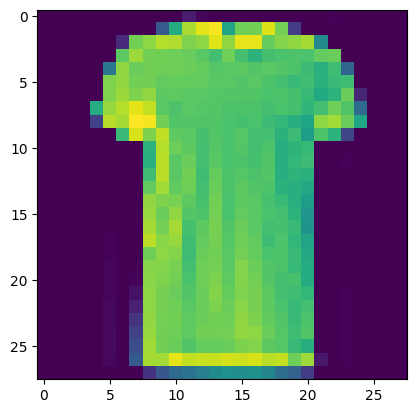

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(train_images[17])

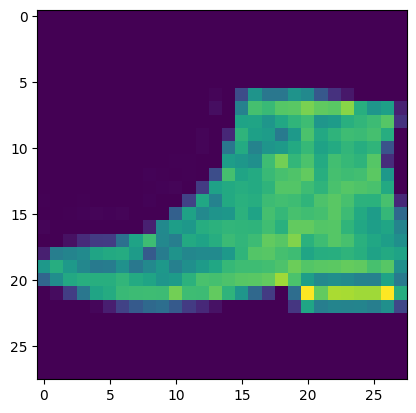

In [20]:
plt.imshow(train_images[1700])

In [21]:
print(train_labels[1700])

9


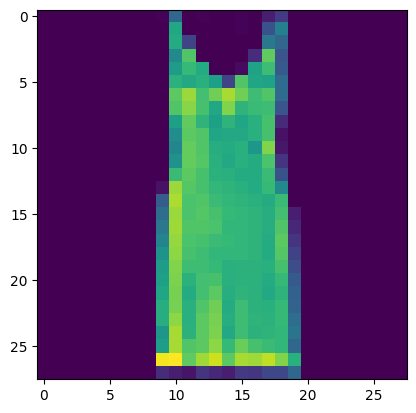

In [22]:
plt.imshow(train_images[27000])

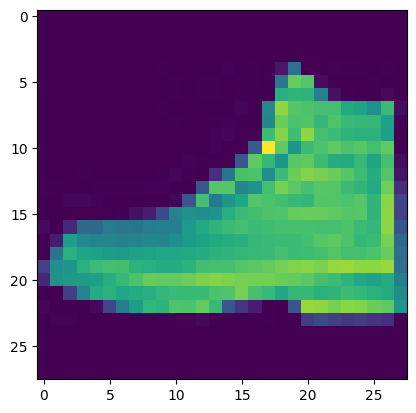

In [24]:
plt.imshow(train_images[50000])

In [25]:
print(train_labels[50000])

9


In [47]:
from keras.layers import Flatten
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(10))

In [48]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels,
          epochs=100,
          batch_size=32, 
          validation_split=0.2)

Epoch 1/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3559 - accuracy: 0.8808 - val_loss: 0.8931 - val_accuracy: 0.8339
Epoch 2/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3677 - accuracy: 0.8771 - val_loss: 0.7572 - val_accuracy: 0.8335
Epoch 3/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3652 - accuracy: 0.8793 - val_loss: 0.8645 - val_accuracy: 0.8374
Epoch 4/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3563 - accuracy: 0.8817 - val_loss: 0.7930 - val_accuracy: 0.8441
Epoch 5/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3478 - accuracy: 0.8813 - val_loss: 0.8442 - val_accuracy: 0.8434
Epoch 6/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3698 - accuracy: 0.8773 - val_loss: 0.8010 - val_accuracy: 0.8336
Epoch 7/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3505 - accuracy: 0.8808 - val_loss: 0.8153 - val_ac

In [54]:
loss, acc = model.evaluate(test_images, test_labels)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

313/313 [==============================] - 0s 1ms/step - loss: 1.2555 - accuracy: 0.8299

Testing loss: 1.26, acc: 0.83%


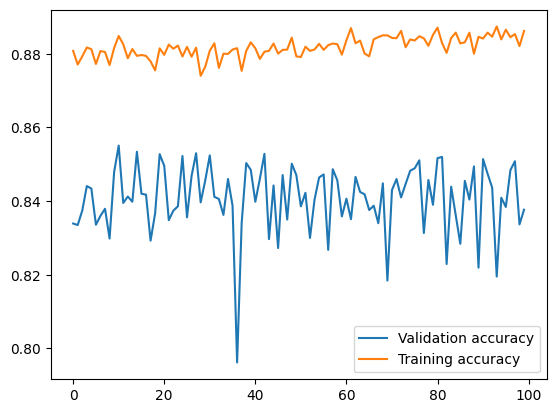

In [55]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.legend(['Validation accuracy', 'Training accuracy'])

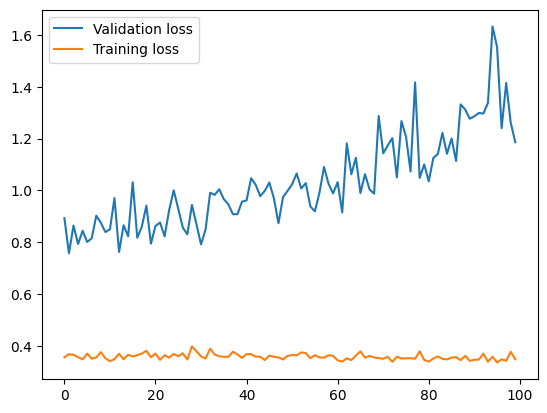

In [56]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['Validation loss', 'Training loss'])

In [35]:
predicted_classes = model.predict(test_images)
predicted_labels = np.argmax(predicted_classes, axis=1)

313/313 [==============================] - 0s 1ms/step


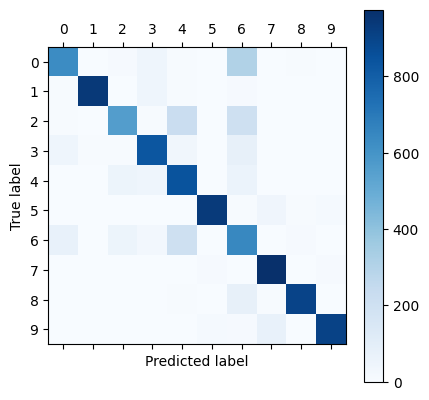

In [37]:
from sklearn.metrics import confusion_matrix
plt.matshow(confusion_matrix(test_labels, predicted_labels), cmap="Blues")
plt.colorbar()
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Predicted label")
plt.ylabel("True label");